## Dataset Link:

###  1.https://www.kaggle.com/praveengovi/coronahack-chest-xraydataset
###   2.https://github.com/ieee8023/covid-chestxray-dataset

### Positive Data exploration

In [3]:
import pandas as pd
import os
import numpy as np

datapath1='covid-chestxray-dataset-master'
dataset_path='dataset'

categories=os.listdir(dataset_path)
print(categories)

dataset=pd.read_csv(os.path.join(datapath1,'metadata.csv'))
findings=dataset['finding']
image_names=dataset['filename']

['covid19 negative', 'covid19 positive']


In [2]:
dataset.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 950 entries, 0 to 949
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   patientid               950 non-null    object 
 1   offset                  697 non-null    float64
 2   sex                     870 non-null    object 
 3   age                     713 non-null    float64
 4   finding                 950 non-null    object 
 5   RT_PCR_positive         593 non-null    object 
 6   survival                361 non-null    object 
 7   intubated               248 non-null    object 
 8   intubation_present      250 non-null    object 
 9   went_icu                397 non-null    object 
 10  in_icu                  335 non-null    object 
 11  needed_supplemental_O2  90 non-null     object 
 12  extubated               37 non-null     object 
 13  temperature             78 non-null     float64
 14  pO2_saturation          119 non-null    fl

In [4]:
dataset.isnull().sum()

patientid                   0
offset                    253
sex                        80
age                       237
finding                     0
RT_PCR_positive           357
survival                  589
intubated                 702
intubation_present        700
went_icu                  553
in_icu                    615
needed_supplemental_O2    860
extubated                 913
temperature               872
pO2_saturation            831
leukocyte_count           934
neutrophil_count          922
lymphocyte_count          910
view                        0
modality                    0
date                      289
location                   56
folder                      0
filename                    0
doi                       568
url                         0
license                   245
clinical_notes            182
other_notes               514
Unnamed: 29               945
dtype: int64

### Data Preprocessing

In [4]:
dataset.dropna(how='all')


,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
1,2,3.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
2,2,5.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
3,2,6.0,M,65.0,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,"On January 22, 2020, a 65-year-old man with a ...",NaN,NaN
4,4,0.0,F,52.0,Pneumonia/Viral/COVID-19,Y,NaN,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,NaN,diffuse infiltrates in the bilateral lower lungs,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,479,0.0,F,40.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,...,NaN,United Kingdom,images,072ecaf8c60a81980abb57150a8016_jumbo-9.jpeg,NaN,https://radiopaedia.org/cases/multifocal-round...,CC BY-NC-SA,Asthmatic. Shortness of breath and wheeze. Rou...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
946,479,70.0,F,40.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,...,NaN,United Kingdom,images,ff33c406392b968d483174c97eb857_jumbo-9.jpeg,NaN,https://radiopaedia.org/cases/multifocal-round...,CC BY-NC-SA,Asthmatic. Shortness of breath and wheeze. The...,"Case courtesy of Dr Ian Bickle, Radiopaedia.or...",NaN
947,480,NaN,M,26.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,images,000001-266.jpg,NaN,https://www.eurorad.org/case/947,CC BY-NC-SA 4.0,fire-eater accidentally ingested a paraffin mi...,NaN,NaN
948,481,NaN,M,50.0,Pneumonia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,images,000001-272.jpg,NaN,https://www.eurorad.org/case/934,CC BY-NC-SA 4.0,"The patient, a heavy smoker, was referred to t...",NaN,NaN


In [5]:
dataset.fillna('unknown', inplace=True)
dataset.isnull().sum()

patientid                 0
offset                    0
sex                       0
age                       0
finding                   0
RT_PCR_positive           0
survival                  0
intubated                 0
intubation_present        0
went_icu                  0
in_icu                    0
needed_supplemental_O2    0
extubated                 0
temperature               0
pO2_saturation            0
leukocyte_count           0
neutrophil_count          0
lymphocyte_count          0
view                      0
modality                  0
date                      0
location                  0
folder                    0
filename                  0
doi                       0
url                       0
license                   0
clinical_notes            0
other_notes               0
Unnamed: 29               0
dtype: int64

In [6]:
dataset.head()

,patientid,offset,sex,age,finding,RT_PCR_positive,survival,intubated,intubation_present,went_icu,...,date,location,folder,filename,doi,url,license,clinical_notes,other_notes,Unnamed: 29
0,2,0,M,65,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 22, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-a-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,unknown,"On January 22, 2020, a 65-year-old man with a ...",unknown,unknown
1,2,3,M,65,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 25, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-b-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,unknown,"On January 22, 2020, a 65-year-old man with a ...",unknown,unknown
2,2,5,M,65,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 27, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-c-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,unknown,"On January 22, 2020, a 65-year-old man with a ...",unknown,unknown
3,2,6,M,65,Pneumonia/Viral/COVID-19,Y,Y,N,N,N,...,"January 28, 2020","Cho Ray Hospital, Ho Chi Minh City, Vietnam",images,auntminnie-d-2020_01_28_23_51_6665_2020_01_28_...,10.1056/nejmc2001272,https://www.nejm.org/doi/full/10.1056/NEJMc200...,unknown,"On January 22, 2020, a 65-year-old man with a ...",unknown,unknown
4,4,0,F,52,Pneumonia/Viral/COVID-19,Y,unknown,N,N,N,...,"January 25, 2020","Changhua Christian Hospital, Changhua City, Ta...",images,nejmc2001573_f1a.jpeg,10.1056/NEJMc2001573,https://www.nejm.org/doi/full/10.1056/NEJMc200...,unknown,diffuse infiltrates in the bilateral lower lungs,unknown,unknown


### Data extraction and integration

In [7]:
#positives_index=np.concatenate((np.where(findings=='COVID-19')[0],np.where(findings=='SARS')[0]))
positives_index=np.where(findings=='Pneumonia/Viral/COVID-19')[0]
positive_image_names=image_names[positives_index]

In [8]:
positive_image_names.shape

(584,)

In [9]:
import cv2
c=0
for positive_image_name in positive_image_names:
    image=cv2.imread(os.path.join(datapath1,'images',positive_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[1],positive_image_name),image)
        c+=1
    except Exception as e:
        print(e)
print(c)

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgcodecs\src\loadsave.cpp:662: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgcodecs\src\loadsave.cpp:662: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgcodecs\src\loadsave.cpp:662: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgcodecs\src\loadsave.cpp:662: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::imwrite_'

OpenCV(4.0.1) C:\ci\opencv-suite_1573470242804\work\modules\imgcodecs\src\loadsave.cpp:662: error: (-2:Unspecified error) could not find a writer for the specified extension in function 'cv::i

### Negative data exploration

In [10]:
import pandas as pd
datapath2='archive'

dataset1=pd.read_csv(os.path.join(datapath2,'Chest_xray_Corona_Metadata.csv'))

In [11]:
dataset1.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,NaN,NaN
1,1,IM-0127-0001.jpeg,Normal,TRAIN,NaN,NaN
2,2,IM-0125-0001.jpeg,Normal,TRAIN,NaN,NaN
3,3,IM-0122-0001.jpeg,Normal,TRAIN,NaN,NaN
4,4,IM-0119-0001.jpeg,Normal,TRAIN,NaN,NaN


In [12]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              5910 non-null   int64 
 1   X_ray_image_name        5910 non-null   object
 2   Label                   5910 non-null   object
 3   Dataset_type            5910 non-null   object
 4   Label_2_Virus_category  69 non-null     object
 5   Label_1_Virus_category  4334 non-null   object
dtypes: int64(1), object(5)
memory usage: 277.2+ KB


### Data Preprocessing

In [13]:
dataset1.dropna(how='all')
dataset1.isnull().sum()

Unnamed: 0                   0
X_ray_image_name             0
Label                        0
Dataset_type                 0
Label_2_Virus_category    5841
Label_1_Virus_category    1576
dtype: int64

In [14]:
dataset1.fillna('0', inplace=True)
dataset1.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

In [15]:
dataset1.head()

,Unnamed: 0,X_ray_image_name,Label,Dataset_type,Label_2_Virus_category,Label_1_Virus_category
0,0,IM-0128-0001.jpeg,Normal,TRAIN,0,0
1,1,IM-0127-0001.jpeg,Normal,TRAIN,0,0
2,2,IM-0125-0001.jpeg,Normal,TRAIN,0,0
3,3,IM-0122-0001.jpeg,Normal,TRAIN,0,0
4,4,IM-0119-0001.jpeg,Normal,TRAIN,0,0


In [16]:
dataset1.isnull().sum()

Unnamed: 0                0
X_ray_image_name          0
Label                     0
Dataset_type              0
Label_2_Virus_category    0
Label_1_Virus_category    0
dtype: int64

### Data extraction and integration

In [17]:
findings=dataset1['Label_2_Virus_category']
image_names=dataset1['X_ray_image_name']

In [18]:
p_index=np.where(findings=='COVID-19')[0]

In [19]:
p_names=image_names[p_index]

In [20]:
p_names.count()

58

In [21]:
print(p_names)

5221                         kjr-21-e25-g001-l-a.jpg
5222                         kjr-21-e24-g003-l-a.jpg
5223                         kjr-21-e24-g002-l-a.jpg
5224                         kjr-21-e24-g001-l-a.jpg
5225                        jkms-35-e79-g001-l-c.jpg
5226                        jkms-35-e79-g001-l-b.jpg
5227                        jkms-35-e79-g001-l-a.jpg
5228                                   gr1_lrg-b.jpg
5229                                   gr1_lrg-a.jpg
5230                       all14238-fig-0001-m-b.jpg
5237       FE9F9A5D-2830-46F9-851B-1FF4534959BE.jpeg
5238       F63AB6CE-1968-4154-A70F-913AF154F53D.jpeg
5239       F4341CE7-73C9-45C6-99C8-8567A5484B63.jpeg
5240       F2DE909F-E19C-4900-92F5-8F435B031AC6.jpeg
5242       E63574A7-4188-4C8D-8D17-9D67A18A1AFA.jpeg
5243       E1724330-1866-4581-8CD8-CEC9B8AFEDDE.jpeg
5244       D7AF463C-2369-492D-908D-BE1911CCD74C.jpeg
5245       D5ACAA93-C779-4E22-ADFA-6A220489F840.jpeg
5246       9C34AF49-E589-44D5-92D3-168B3B04E4A

In [22]:
dataset_path='dataset'
for positive_image_name in p_names:
    image=cv2.imread(os.path.join(datapath2,'images',positive_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[1],positive_image_name),image)
    except Exception as e:
        print(e)

In [24]:
import glob
for positive_image_name in glob.glob("covid_positive/*.jpeg"):
    image= cv2.imread(positive_image_name)
    try::::
        cv2.imwrite(os.path.join(dataset_path,categories[1],positive_image_name),image)
    except Exception as e:
        print(e)

SyntaxError: invalid syntax (<ipython-input-24-f7ec7ad34983>, line 4)

In [25]:
import os
import cv2
img=cv2.imread(r'C:\Users\Debabrata\Downloads\dataset\covid19 positive\0a7faa2a.jpg')
cv2.imshow('positive_image',img)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

In [23]:
datapath2='archive'

dataset=pd.read_csv(os.path.join(datapath2,'Chest_xray_Corona_Metadata.csv'))
findings=dataset['Label']
image_names=dataset['X_ray_image_name']

In [24]:
negative_index=np.where(findings=='Normal')[0]

In [25]:
negative_image_names=image_names[negative_index]

In [26]:
for negative_image_name in negative_image_names:
    image=cv2.imread(os.path.join(datapath2,'images',negative_image_name))
    try:
        cv2.imwrite(os.path.join(dataset_path,categories[0],negative_image_name),image)
    except Exception as e:
        print(e)

In [28]:
negative_image_names.shape

(1576,)

### Data visualization

In [30]:
import os
import cv2
img=cv2.imread(r'C:\Users\Debabrata\Downloads\dataset\covid19 negative\IM-0001-0001.jpeg')
cv2.imshow('negative_image',img)
cv2.waitKey(0) 
cv2.destroyAllWindows() 

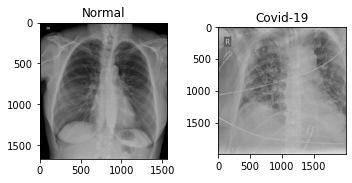

In [29]:
import glob
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg

negative_images = []
for img_path in glob.glob(r'dataset/covid19 negative/*'):
  negative_images.append(mpimg.imread(img_path))

plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.title('Normal')
plt.imshow(negative_images[0], cmap='gray')

positive_images = []
for img_path in glob.glob(r'dataset/covid19 positive/*'):
  positive_images.append(mpimg.imread(img_path))

plt.subplot(1,2,2)
plt.title('Covid-19')
plt.imshow(positive_images[0], cmap='gray')
plt.tight_layout()

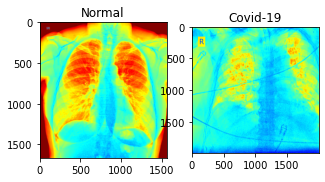

In [30]:
import cv2

normal_heatmap = cv2.applyColorMap(negative_images[0], cv2.COLORMAP_JET)
plt.figure(figsize=(5,5))
plt.subplot(1,2,1)
plt.title('Normal')
plt.imshow(normal_heatmap)

positive_heatmap = cv2.applyColorMap(positive_images[0], cv2.COLORMAP_JET)
plt.subplot(1,2,2)
plt.title('Covid-19')
plt.imshow(positive_heatmap)

1576
1626


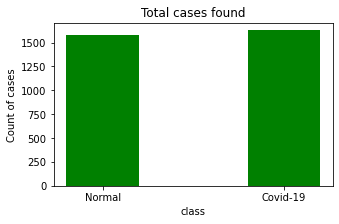

In [31]:
negative_images=np.array(negative_images)
print(negative_images.shape[0])
positive_images=np.array(positive_images)
print(positive_images.shape[0])

data = {'Normal':negative_images.shape[0], 'Covid-19':positive_images.shape[0]} 

Class = list(data.keys()) 
Counts = list(data.values()) 

fig = plt.figure(figsize = (5, 3)) 

plt.bar(Class, Counts, color ='green', width = 0.4) 
  
plt.xlabel("class") 
plt.ylabel("Count of cases") 
plt.title("Total cases found") 
plt.show() 

### Label categorising

In [4]:
import os
import cv2
dataset_path='dataset'
categories=os.listdir(dataset_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary

print(label_dict)
print(categories)

print(labels)

{'covid19 negative': 0, 'covid19 positive': 1}
['covid19 negative', 'covid19 positive']
[0, 1]


### Loading the image data into list and preprocessing

In [33]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(dataset_path,category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

### Image data normalization

In [34]:
import numpy as np
data=np.array(data)/255.0

data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)


### One-hot encoding on labels 

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

new_target=to_categorical(target)

In [36]:
data

array([[[[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        ...,

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]],

        [[0.00392157],
         [0.00392157],
         [0.00392157],
         ...,
         [0.00392157],
         [0.00392157],
         [0.00392157]]],


       [[[0.12156863],
         [0.1254902 ],
         [0.12

In [37]:
np.save('data',data)
np.save('target',new_target)

In [38]:
print(data.shape[0])

3202


In [39]:
data.shape[1:]

(100, 100, 1)

## CNN Architecture
### Sequential Model

In [40]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D
from tensorflow.keras.utils import normalize
from tensorflow.keras.layers import Concatenate
from tensorflow.keras import Input
from tensorflow.keras.callbacks import ModelCheckpoint

input_shape=data.shape[1:]
inp=Input(shape=input_shape)
convs=[]

parrallel_kernels=[3,5,7]

for k in range(len(parrallel_kernels)):

    conv = Conv2D(128, parrallel_kernels[k],padding='same',activation='relu',input_shape=input_shape,strides=1)(inp)
    convs.append(conv)

out = Concatenate()(convs)
conv_model = Model(inp,out)

model = Sequential()
model.add(conv_model)

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,input_dim=128,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 100, 100, 384)     11008     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 98, 98, 64)        221248    
_________________________________________________________________
activation (Activation)      (None, 98, 98, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 32)        18464     
_________________________________________________________________
activation_1 (Activation)    (None, 47, 47, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0

### Train-test split

In [41]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

### Training

In [45]:
checkpoint = ModelCheckpoint('model-{epoch:03d}.model',monitor='val_loss',verbose=0,save_best_only=True,mode='auto')
history=model.fit(train_data,train_target,epochs=20,callbacks=[checkpoint],validation_split=0.1)

Epoch 1/20
67/67 [==============================] - ETA: 0s - loss: 0.2839 - accuracy: 0.8835WARNING:tensorflow:From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\training\tracking\tracking.py:111: Model.state_updates (from tensorflow.python.keras.engine.training) is deprecated and will be removed in a future version.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: model-001.model\assets
67/67 [==============================] - 419s 6s/step - loss: 0.2839 - accuracy: 0.8835 - val_loss: 0.1538 - val_accuracy: 0.9538
Epoch 2/20
67/67 [==============================] - 352s 5s/step - loss: 0.1495 - accuracy: 0.9457 - val_loss: 0.0615 - val_accuracy: 0.9916
Epoch 3/20
67/67 [==============================] - 389s 6s/step - loss: 0.0919 - accuracy: 0.9715 - v

### Train-validation Loss

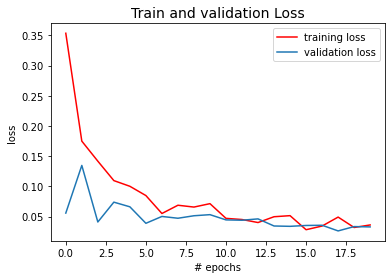

In [53]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.title('Train and validation Loss', fontsize=14) 
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Train-validation Accuracy

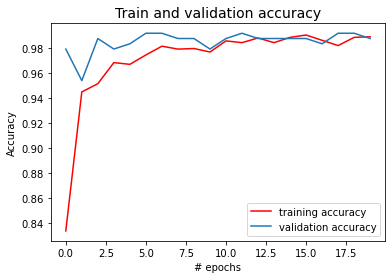

In [54]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.title('Train and validation accuracy', fontsize=14) 
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Testing

In [48]:
print(model.evaluate(test_data,test_target))

9/9 [==============================] - 9s 1s/step - loss: 0.0054 - accuracy: 1.0000
[0.005375401116907597, 1.0]


## Performance Evaluation 
### Confussion Matrix

loss :  0.005375400651246309
accuracy :  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       166
           1       1.00      1.00      1.00        98

    accuracy                           1.00       264
   macro avg       1.00      1.00      1.00       264
weighted avg       1.00      1.00      1.00       264

accuracy: 1.0000
sensitivity: 1.0000
specificity: 1.0000


Text(0.5, 15.0, 'Predicted label')

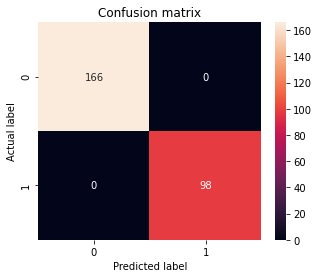

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(test_data, batch_size=8)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(test_target, axis=1)


predicted_metrics = model.evaluate(test_data,test_target,
                                  batch_size=8, verbose=0)
for name, value in zip(model.metrics_names, predicted_metrics):
  print(name, ': ', value)
print(classification_report(y_pred, y_true))
cm = confusion_matrix(y_pred, y_true)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
print("accuracy: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Preprocessing for ResNet model building

In [5]:
img_size=100
x=[]
y=[]


for category in categories:
    folder_path=os.path.join(dataset_path,category)
    img_names=os.listdir(folder_path)
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)           
            #Coverting the image into gray scale
            resized=cv2.resize(gray,(img_size,img_size))
            #resizing the gray scale into 100x100, since we need a fixed common size for all the images in the dataset
            x.append(resized)
            y.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)

        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [6]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelBinarizer
x = np.array(x) / 255.0
y = np.array(y)
lb = LabelBinarizer()
y = lb.fit_transform(y)
y = tf.keras.utils.to_categorical(y)

### Data Augmentation

In [7]:
Datagen= tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=True,featurewise_std_normalization=True,
                            rotation_range=20,width_shift_range=0.2,
                            height_shift_range=0.2,horizontal_flip=True)

### ResNet Model

In [10]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
import numpy as np

input_img = tf.keras.layers.Input(shape=(100, 100, 3))
baseModel = ResNet50(weights="imagenet", include_top=False,
input_tensor=tf.keras.layers.Input(shape=(100, 100, 3)))

for layer in baseModel.layers[:-3]:
    layer.trainable = False
x = baseModel.output
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.25)(x)
    

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(2, activation='softmax')(x)
  
    
covid_model = tf.keras.models.Model(baseModel.input, x)
adagrad=tf.keras.optimizers.Adagrad(lr=0.001)
covid_model.compile(optimizer=adagrad, loss='binary_crossentropy',metrics=["accuracy"])
covid_model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

### Train-validation-test split

In [8]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1, stratify=y)

In [9]:
(x_train, x_valid, y_train, y_valid) = train_test_split(x_train, y_train,test_size=0.1, stratify=y_train)

### Model training

In [8]:
 early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)
history= covid_model.fit_generator(Datagen.flow(x_train, y_train, batch_size=8),
                      steps_per_epoch=len(x_train) / 8,
                      validation_data=(x_valid, y_valid), epochs=20,callbacks = [early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.


C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
268/267 [==============================] - 61s 227ms/step - loss: 1.1364 - accuracy: 0.5260 - val_loss: 0.6882 - val_accuracy: 0.5966
Epoch 2/20
268/267 [==============================] - 62s 230ms/step - loss: 1.0548 - accuracy: 0.5297 - val_loss: 0.5467 - val_accuracy: 0.6050
Epoch 3/20
268/267 [==============================] - 60s 224ms/step - loss: 1.0468 - accuracy: 0.5218 - val_loss: 0.6455 - val_accuracy: 0.7395
Epoch 4/20
268/267 [==============================] - 59s 219ms/step - loss: 0.9697 - accuracy: 0.5419 - val_loss: 0.5548 - val_accuracy: 0.8697
Epoch 5/20
268/267 [==============================] - 59s 221ms/step - loss: 0.9618 - accuracy: 0.5508 - val_loss: 0.6207 - val_accuracy: 0.7101
Epoch 6/20
268/267 [==============================] - 58s 215ms/step - loss: 0.9011 - accuracy: 0.5831 - val_loss: 0.6080 - val_accuracy: 0.8109
Epoch 7/20
268/267 [==============================] - 59s 219ms/step - loss: 0.9232 - accuracy: 0.5779 - val_loss: 0.4953 - val_ac

### Train-validation loss

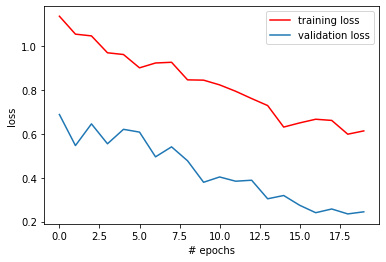

In [9]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Train-validation accuracy

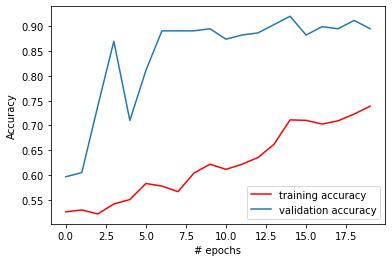

In [10]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model testing

In [11]:
print(covid_model.evaluate(x_test,y_test))

9/9 [==============================] - 4s 460ms/step - loss: 0.2102 - accuracy: 0.9356
[0.21019649505615234, 0.935606062412262]


In [10]:
print(covid_model.evaluate(x_test,y_test))

11/11 [==============================] - 5s 477ms/step - loss: 0.4979 - accuracy: 0.7975
[0.4978848695755005, 0.7975077629089355]


## Performance evaluation
### Confussion matrix

loss :  0.2237580120563507
accuracy :  0.9242424368858337
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       146
           1       0.96      0.86      0.91       118

    accuracy                           0.92       264
   macro avg       0.93      0.92      0.92       264
weighted avg       0.93      0.92      0.92       264

accuracy: 0.9242
sensitivity: 0.9726
specificity: 0.8644


Text(0.5, 15.0, 'Predicted label')

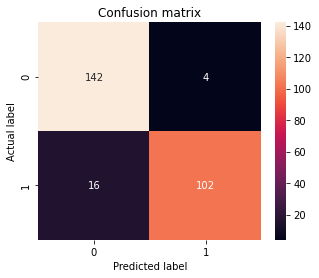

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = covid_model.predict(x_test, batch_size=8)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


predicted_metrics = covid_model.evaluate(x_test,y_test,
                                  batch_size=8, verbose=0)
for name, value in zip(covid_model.metrics_names, predicted_metrics):
  print(name, ': ', value)
print(classification_report(y_pred, y_true))
cm = confusion_matrix(y_pred, y_true)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
print("accuracy: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Probability of classes on given random input image

In [12]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import sys
from PIL import Image



successive_outputs = [layer.output for layer in covid_model.layers[1:]]

#visualization_model = Model(img_input, successive_outputs)

visualization_model = tf.keras.models.Model(inputs = covid_model.input, outputs = successive_outputs)

img = cv2.imread(r'C:\Users\Debabrata\Downloads\dataset\covid19 positive\covid19 positive_original_0a6c60063b4bae4de001caaba306d1_jumbo.jpeg_06b17b2f-5e66-4daa-a24b-6a28d6f4fc1b.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (100, 100))
x = img_to_array(img)  # Numpy array with shape (512, 512, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 512, 512, 3)

# Rescale by 1/255 
x /= 255

successive_feature_maps = covid_model.predict(x)
print(successive_feature_maps)

layer_names = [layer.name for layer in covid_model.layers]



for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4: 

    
    n_features = feature_map.shape[-1]  
    size = feature_map.shape[1]
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):

      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i + 1) * size] = x
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')


[[0.14626382 0.8537362 ]]


### VGG16 Model

In [8]:
import tensorflow as tf
import pandas as pd
import random
from tensorflow.keras.applications import VGG16
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelBinarizer
import cv2
import os

input_img = tf.keras.layers.Input(shape=(100, 100, 3))
baseModel = VGG16(weights="imagenet", include_top=False,
input_tensor=tf.keras.layers.Input(shape=(100, 100, 3)))

for layer in baseModel.layers[:-3]:
    layer.trainable = False
x = baseModel.output
x = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

x = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.25)(x)
    

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)

x = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = tf.keras.layers.BatchNormalization(axis=-1)(x)
x = tf.keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = tf.keras.layers.Dropout(0.25)(x)

x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)

x = tf.keras.layers.Dense(2, activation='softmax')(x)
  
    
covid_model = tf.keras.models.Model(baseModel.input, x)
adagrad=tf.keras.optimizers.Adagrad(lr=0.01)
covid_model.compile(optimizer=adagrad, loss='binary_crossentropy',metrics=["accuracy"])
covid_model.summary()

58892288/58889256 [==============================] - 47s 1us/step
Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
______________________________________________________

### Model training 

In [10]:
 early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)
history= covid_model.fit_generator(Datagen.flow(x_train, y_train, batch_size=8),
                      steps_per_epoch=len(x_train) / 8,
                      validation_data=(x_valid, y_valid), epochs=20,callbacks = [early_stopping])

Instructions for updating:
Please use Model.fit, which supports generators.


C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\ProgramData\Anaconda3\lib\site-packages\keras_preprocessing\image\image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
268/267 [==============================] - 106s 396ms/step - loss: 0.5034 - accuracy: 0.8142 - val_loss: 0.1993 - val_accuracy: 0.9328
Epoch 2/20
268/267 [==============================] - 108s 402ms/step - loss: 0.2778 - accuracy: 0.9027 - val_loss: 0.0604 - val_accuracy: 0.9790
Epoch 3/20
268/267 [==============================] - 109s 408ms/step - loss: 0.2280 - accuracy: 0.9223 - val_loss: 0.0811 - val_accuracy: 0.9622
Epoch 4/20
268/267 [==============================] - 106s 396ms/step - loss: 0.2117 - accuracy: 0.9158 - val_loss: 0.0510 - val_accuracy: 0.9916
Epoch 5/20
268/267 [==============================] - 105s 392ms/step - loss: 0.2288 - accuracy: 0.9219 - val_loss: 0.1151 - val_accuracy: 0.9706
Epoch 6/20
268/267 [==============================] - 106s 397ms/step - loss: 0.1524 - accuracy: 0.9448 - val_loss: 0.0847 - val_accuracy: 0.9706
Epoch 7/20
268/267 [==============================] - 108s 402ms/step - loss: 0.1855 - accuracy: 0.9373 - val_loss: 0.0422 -

### Train-validation loss

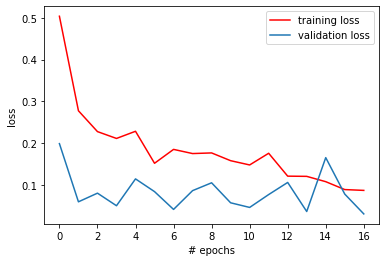

In [11]:
from matplotlib import pyplot as plt

plt.plot(history.history['loss'],'r',label='training loss')
plt.plot(history.history['val_loss'],label='validation loss')
plt.xlabel('# epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### Train-validation accuracy

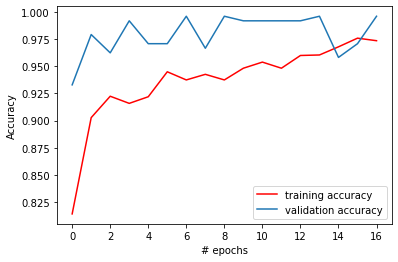

In [12]:
plt.plot(history.history['accuracy'],'r',label='training accuracy')
plt.plot(history.history['val_accuracy'],label='validation accuracy')
plt.xlabel('# epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Model testing

In [13]:
print(covid_model.evaluate(x_test,y_test))

9/9 [==============================] - 8s 835ms/step - loss: 0.0350 - accuracy: 0.9924
[0.035031117498874664, 0.9924242496490479]


## Performance evaluation
### Confussion matrix

loss :  0.035031117498874664
accuracy :  0.9924242496490479
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       158
           1       0.99      0.99      0.99       106

    accuracy                           0.99       264
   macro avg       0.99      0.99      0.99       264
weighted avg       0.99      0.99      0.99       264

accuracy: 0.9924
sensitivity: 0.9937
specificity: 0.9906


Text(0.5, 15.0, 'Predicted label')

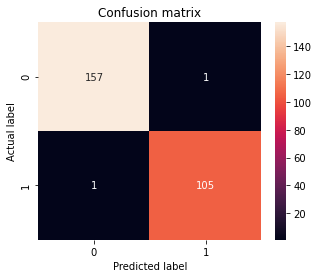

In [14]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = covid_model.predict(x_test, batch_size=8)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)


predicted_metrics = covid_model.evaluate(x_test,y_test,
                                  batch_size=8, verbose=0)
for name, value in zip(covid_model.metrics_names, predicted_metrics):
  print(name, ': ', value)
print(classification_report(y_pred, y_true))
cm = confusion_matrix(y_pred, y_true)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])
    
print("accuracy: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d")
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')